<a href="https://colab.research.google.com/github/jhanvikh/jhanvi/blob/main/iris_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas-profiling matplotlib seaborn --quiet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.5 MB/s eta 0:00:00


In [ ]:
!pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 45.2 MB/s eta 0:00:00


In [ ]:
!pip list | grep xgboost

xgboost                          2.1.1


In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df=sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

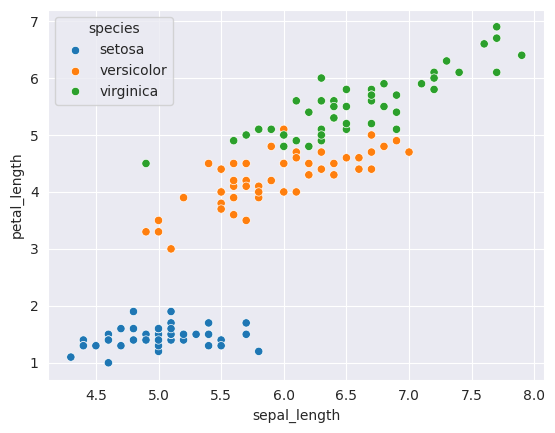

In [8]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');


In [5]:
X = iris_df[numeric_cols]

In [7]:
from sklearn.cluster import KMeans

In [9]:
model=KMeans(n_clusters=3,random_state=42)

In [11]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [16]:
preds=model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [17]:
model.inertia_

78.85566582597727

In [19]:
model=KMeans(random_state=42,n_clusters=6)

In [20]:
model.fit(X)

KMeans(n_clusters=6, random_state=42)

In [21]:
preds=model.predict(X)
preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

In [23]:
model.inertia_

39.066035353535376

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [26]:
pca.fit(X)

PCA(n_components=2)

In [27]:
transformed=pca.transform(X)

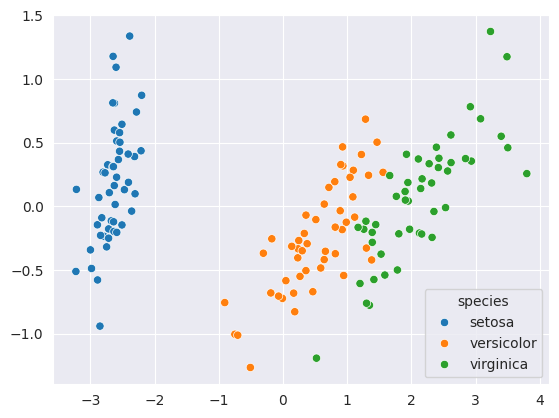

In [28]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2)

In [32]:
transformed = tsne.fit_transform(X)

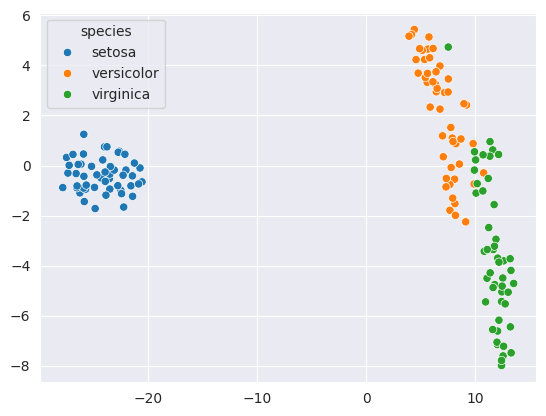

In [34]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);